In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [19]:
df = pd.read_csv('campeonato-brasileiro-full.csv')
print("Arquivo CSV carregado no DataFrame.")

Arquivo CSV carregado no DataFrame.


In [20]:
df.head()  # Exibe as primeiras linhas do DataFrame

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-


In [21]:
df.info()  # Exibe informações sobre o DataFrame, como tipos de dados e valores nulos
print(f"O DataFrame tem {df.shape[0]} linhas e {df.shape[1]} colunas.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  7645 non-null   int64 
 1   rodada              7645 non-null   int64 
 2   data                7645 non-null   object
 3   hora                7645 non-null   object
 4   dia                 7645 non-null   object
 5   mandante            7645 non-null   object
 6   visitante           7645 non-null   object
 7   formacao_mandante   2671 non-null   object
 8   formacao_visitante  2671 non-null   object
 9   tecnico_mandante    3035 non-null   object
 10  tecnico_visitante   3035 non-null   object
 11  vencedor            7645 non-null   object
 12  arena               7645 non-null   object
 13  mandante_placar     7645 non-null   int64 
 14  visitante_placar    7645 non-null   int64 
 15  mandante_estado     7645 non-null   object
 16  visitante_estado    7645

In [7]:
df.describe()  # Exibe estatísticas descritivas do DataFrame

,ID,rodada,mandante_placar,visitante_placar
count,7645.000000,7645.000000,7645.000000,7645.000000
mean,3823.000000,20.196207,1.554088,1.027338
std,2207.065737,11.489249,1.234262,1.030366
min,1.000000,1.000000,0.000000,0.000000
25%,1912.000000,10.000000,1.000000,0.000000
50%,3823.000000,20.000000,1.000000,1.000000
75%,5734.000000,30.000000,2.000000,2.000000
max,7645.000000,46.000000,7.000000,7.000000


In [22]:
# Contando a quantidade de valores nulos em cada coluna
df.isnull().sum()

ID                       0
rodada                   0
data                     0
hora                     0
dia                      0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_placar          0
visitante_placar         0
mandante_estado          0
visitante_estado         0
estado_vencedor          0
dtype: int64

In [9]:
# Removendo as linhas que contêm qualquer valor nulo
df_sem_nulos = df.dropna()

# Verificando se os valores nulos foram removidos
print("Contagem de nulos após o tratamento:")
print(df_sem_nulos.isnull().sum())

# Para continuar o projeto, vamos usar o DataFrame sem os nulos
df = df_sem_nulos

Contagem de nulos após o tratamento:
ID                    0
rodada                0
data                  0
hora                  0
dia                   0
mandante              0
visitante             0
formacao_mandante     0
formacao_visitante    0
tecnico_mandante      0
tecnico_visitante     0
vencedor              0
arena                 0
mandante_placar       0
visitante_placar      0
mandante_estado       0
visitante_estado      0
estado_vencedor       0
dtype: int64


In [36]:
# Calculando o Z-score para as colunas de placar
df['z_score_mandante'] = np.abs(stats.zscore(df['mandante_placar']))
df['z_score_visitante'] = np.abs(stats.zscore(df['visitante_placar']))

# Filtrando para ver os outliers (Z-score > 3)
outliers = df[(df['z_score_mandante'] > 3) | (df['z_score_visitante'] > 3)]

print("Partidas identificadas como outliers com base nos placares:")
outliers[['rodada', 'mandante', 'visitante', 'mandante_placar', 'visitante_placar']]

Partidas identificadas como outliers com base nos placares:


,rodada,mandante,visitante,mandante_placar,visitante_placar
23,2,Vasco,Goias,6,4
27,3,Corinthians,Paysandu,6,1
65,6,Goias,Juventude,7,0
125,11,Parana,Flamengo,6,2
270,23,Paysandu,Guarani,6,1
...,...,...,...,...,...
7040,16,Sport,Internacional,3,5
7049,17,Corinthians,Flamengo,1,5
7189,31,Sao Paulo,Internacional,1,5
7228,35,Botafogo-RJ,Gremio,2,5


In [37]:
# 9. Removendo os outliers do DataFrame
df_sem_outliers = df[(df['z_score_mandante'] <= 3) & (df['z_score_visitante'] <= 3)]

print(f"Tamanho original do DataFrame: {df.shape}")
print(f"Tamanho do DataFrame sem outliers: {df_sem_outliers.shape}")

# Vamos seguir com o DataFrame sem outliers
df = df_sem_outliers

Tamanho original do DataFrame: (7645, 20)
Tamanho do DataFrame sem outliers: (7573, 20)


In [38]:
# 10. normalizando coluna numérica
df['placar_mandante_norm'] = (df['mandante_placar'] - df['mandante_placar'].min()) / (df['mandante_placar'].max() - df['mandante_placar'].min())

# Verificando o resultado
df[['mandante_placar', 'placar_mandante_norm']].head()

,mandante_placar,placar_mandante_norm
0,4,0.8
1,2,0.4
2,1,0.2
3,2,0.4
4,1,0.2


In [39]:
#11. Codificação de variáveis categóricas
vencedor_dummies = pd.get_dummies(df['vencedor'], prefix='vencedor') #hot-hot

# Juntando as novas colunas ao DataFrame original
df = pd.concat([df, vencedor_dummies], axis=1)

# Verificando as novas colunas
df.head()


,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,...,vencedor_Ponte Preta,vencedor_Portuguesa,vencedor_Santa Cruz,vencedor_Santo Andre,vencedor_Santos,vencedor_Sao Caetano,vencedor_Sao Paulo,vencedor_Sport,vencedor_Vasco,vencedor_Vitoria
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# 12. Criação de matriz de correlação
colunas_interesse = ['rodada', 'mandante_placar', 'visitante_placar']

# calculando correlação
matriz_correlacao = df[colunas_interesse].corr()

print("Matriz de correlação:")
matriz_correlacao

Matriz de correlação:


,rodada,mandante_placar,visitante_placar
rodada,1.000000,0.031376,0.002966
mandante_placar,0.031376,1.000000,0.053096
visitante_placar,0.002966,0.053096,1.000000


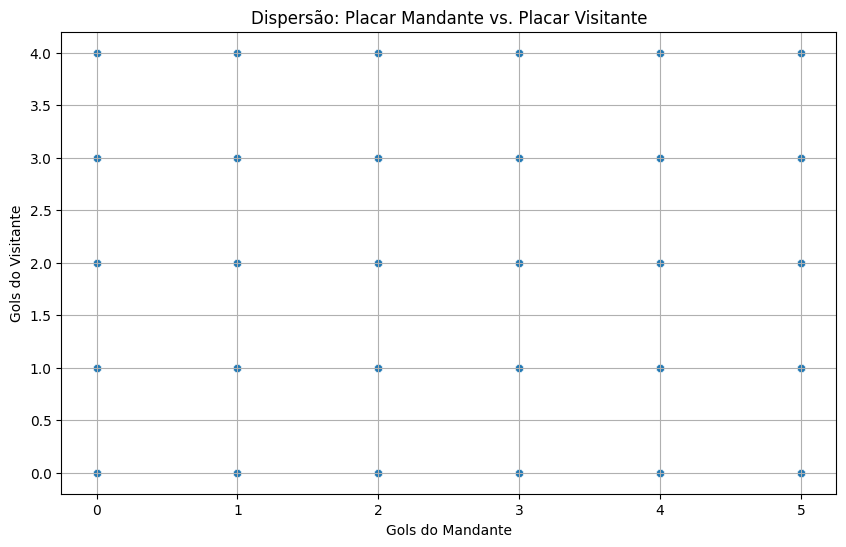

In [41]:
# 13. Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mandante_placar', y='visitante_placar', data=df)
plt.title('Dispersão: Placar Mandante vs. Placar Visitante')
plt.xlabel('Gols do Mandante')
plt.ylabel('Gols do Visitante')
plt.grid(True)
plt.show()

In [42]:
#14. Filtragem de dados com base em uma condição

jogos_flamengo_mandante = df[df['mandante'] == 'Flamengo']

# Exibindo os primeiros jogos
jogos_flamengo_mandante.head()


,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,...,vencedor_Ponte Preta,vencedor_Portuguesa,vencedor_Santa Cruz,vencedor_Santo Andre,vencedor_Santos,vencedor_Sao Caetano,vencedor_Sao Paulo,vencedor_Sport,vencedor_Vasco,vencedor_Vitoria
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
35,48,3,2003-04-13,18:00,Domingo,Flamengo,Fluminense,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
50,51,5,2003-04-19,18:00,Sabado,Flamengo,Santos,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,False
72,73,7,2003-05-03,16:00,Sabado,Flamengo,Vitoria,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
106,107,9,2003-05-18,18:00,Domingo,Flamengo,Guarani,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [43]:
#15. Exportação do dataframe para CSV
df.to_csv('campeonato_tratado.csv', index=False)
print("DataFrame processaso foi salvo com sucesso")

DataFrame processaso foi salvo com sucesso


In [44]:
# 16. Convertendo a coluna 'data' para o formato datetime
df['data'] = pd.to_datetime(df['data'])

# Extraindo ano e mês para novas colunas
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month

#Verificando o resultado
df[['data', 'ano', 'mes']].head()

,data,ano,mes
0,2003-03-29,2003,3
1,2003-03-29,2003,3
2,2003-03-30,2003,3
3,2003-03-30,2003,3
4,2003-03-30,2003,3


In [45]:
# 17. Agrupamento dos dados 

vitorias_por_time = df['vencedor'].value_counts()

print('Números de vitórias por time:')
vitorias_por_time.head(10)  # Mostrando os 10 maiores vencedores

Números de vitórias por time:


vencedor
-                2014
Sao Paulo         333
Santos            313
Flamengo          309
Internacional     299
Atletico-MG       291
Corinthians       291
Cruzeiro          291
Gremio            290
Palmeiras         283
Name: count, dtype: int64

In [46]:
# 18. Criação de colunas derivadas

# Criando a coluna 'diferenca_gols'
df['diferenca_gols'] = df['mandante_placar'] - df['visitante_placar']

# Verificando a nova coluna
df[['mandante_placar', 'visitante_placar', 'diferenca_gols']].head()

,mandante_placar,visitante_placar,diferenca_gols
0,4,2,2
1,2,0,2
2,1,1,0
3,2,2,0
4,1,1,0


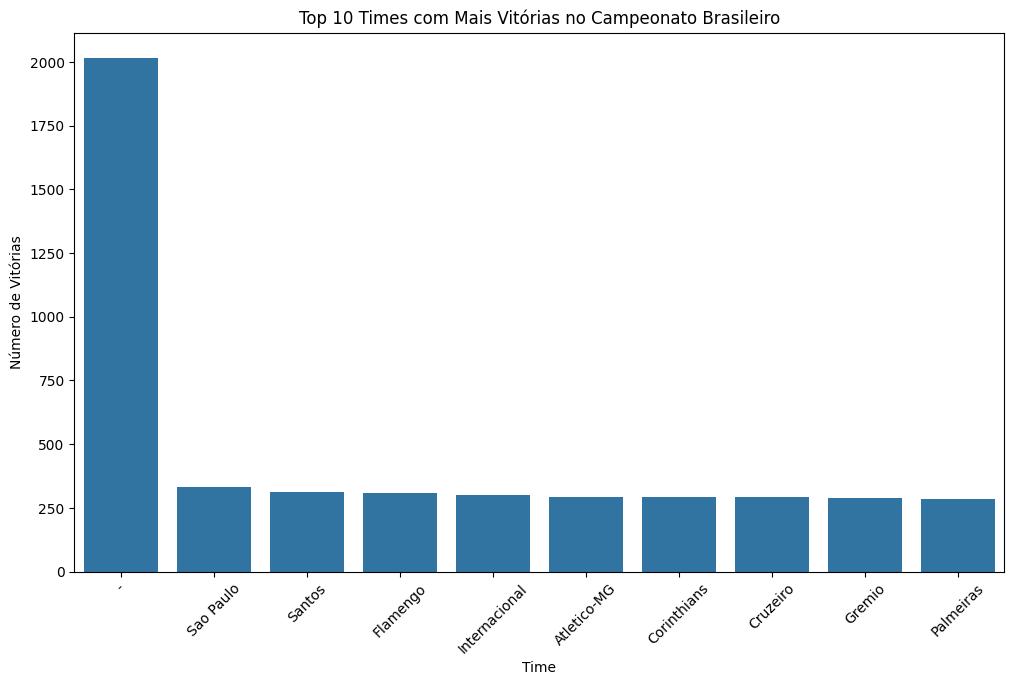

In [48]:
#19. Visualzação com gráficos de barras

# 10 times com mais vitórias
top_10_vencedores = vitorias_por_time.head(10)

# Criando o gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_vencedores.index, y=top_10_vencedores.values)
plt.title('Top 10 Times com Mais Vitórias no Campeonato Brasileiro')
plt.xlabel('Time')
plt.ylabel('Número de Vitórias')
plt.xticks(rotation=45) # Rotaciona os nomes dos times para melhor visualização
plt.show()

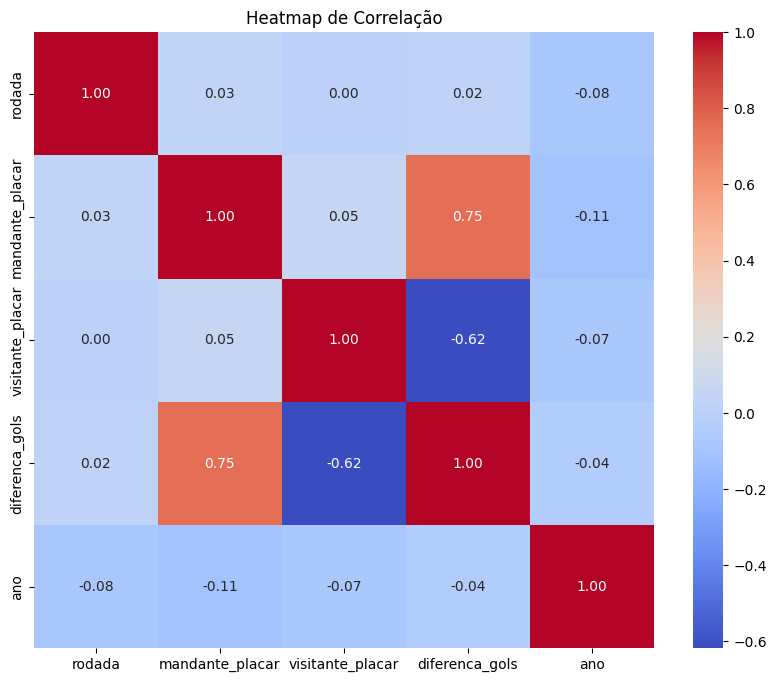

In [50]:
# 20. Heatmap da correlação

# Re-calculando a matriz de correlação com mais colunas numéricas
matriz_correlacao_full = df[['rodada', 'mandante_placar', 'visitante_placar', 'diferenca_gols', 'ano']].corr()

# Criando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao_full, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação')
plt.show()